In [4]:
library(aaltobda)
data("bioassay_posterior")

# Exercise 1)

## a)

The relation between the correlation and the covariance of a pair of random variable $X,Y$ is given by:

$$
\text{cov}(X,Y) = \text{corr}(X,Y)\sigma_X\sigma_Y
$$

with $\sigma$ being the standard deviation. The correlation does not influence the mean. Thus:

In [2]:
mean   = c(0,10)
cov_xy = 0.6 * 10 * 2

cov    = array(c( 10**2, cov_xy , cov_xy, 2**2 ), dim = c(2,2) )

print("Mean vector")
print(mean)
print("Covariance matrix")
print(cov)

[1] "Mean vector"
[1]  0 10
[1] "Covariance matrix"
     [,1] [,2]
[1,]  100   12
[2,]   12    4


## b)

#### Theory: Monte Carlo Standard Error

The Monte Carlo Standard Error measures the standard deviation of different estimates of a quantity of interest when these estimates are obtained from simulations based on random numbers is used. For example if we are computing the mean of a function $f(\cdot)$ over a random variable $x$ then a possible estimator with $S$ samples is given by:

$$
 \mathbb{E}[f(x)] = \int f(x) p(x) \text{d}x \approx \frac{1}{S} \sum_s f(x^{(s)}) = \hat{\mu}^{(S)}
$$

Different random generation will yield a different set of $S$ samples. Thus there will be some variance $\frac{\sigma^2}{S}$ associated with the estimation of $\hat{\mu}^{(S)}$, where $\sigma^2$ is the variance of $p(x)$ . The square root of this variance is the Monte Carlo Standard Error i.e. $\frac{\sigma}{\sqrt{S}}$. Thus, it is the error associated with the estimation due to random generation. This error goes to zero with a rate of $\frac{1}{\sqrt{S}}$.

Also, from the Central Limit Theorem we know that the distribution of the estimator $\hat{\mu}^{(S)}$ will be a Gaussian distributed with mean $\mathbb{E}[f(x)]$  and variance $\frac{\sigma^2}{S}$. From where we also reason that when $S \rightarrow \infty$ the distribution concentrates around the real expected value. 

Thus if a quantity of interest has a MCSE of $0.04$ then this means that the $95.40$% of Monte Carlo estimations will lie between the true mean $\pm 2 \times 0.04 = \pm 0.08$. This is because $95$% of probability mass in a Gaussian distribution lies between twice the standard deviation. More formally if MCSE$=a$ then $P(|\hat{\mu}^{(S)}| \leq \mathbb{E}[f(x)] + 2 a) \leq 0.954$.  

Thus, for the above example any decimal number in the second possition is very likely ( $95$% chance ) random noise due to different set of $S$ samples. In practice $\sigma^2$ is replaced with its empirical estimate as well. So to show the decimal possitions we will show those relevant for the $95$% interval.


#### MCSE for quantiles

The MCSE for quantiles is computed as follows. Suppose we wish to compute the $90$% quantile, i.e. find $a$ and $b$ such that $P( a < x < b )=0.9$. For some distributions this is known analytically. If not we resort to sampling.

Take a random sample $\{x_s\}^S_{s=1}, x_s \sim p(x)$. Now numerically find the values of $a$ and $b$ (for example using ```numpy.quantile```). Now this quantiles are estimated as follows. Mathematically if $I$ denotes the indicator function:

$$
\frac{1}{S}\sum_s I(x_s \leq a) + I(x_s \geq b) \approx 0.1
$$

We can thus interpret this estimation of the quantile as a Bernoulli distribution with $p=0.1$. With probability $p$ we have an outcome $1$ representing a sample $x_s$ lying in the quantile and $0$ lying outside. In particular we have the following probability distribution:

$$
p^{y}(1-p)^{1-y}
$$

Since the variance is $p(1-p)$ and we have $S$ samples then the MCSE is estimated as the variance times the square root of the number of samples as always:

$$
\text{MCSE}_{\text{quantile}} = \sqrt{\frac{p(1-p)}{S}}
$$



In [3]:
## Monte Carlo Standard Error

# expected value
tot_samples     = length( bioassay_posterior$alpha )
mcse_mean_alpha = sd( bioassay_posterior$alpha ) / sqrt( tot_samples ) * 2 # multiplied by 2 see theory above
mcse_mean_beta  = sd( bioassay_posterior$beta  ) / sqrt( tot_samples ) * 2

print("Alpha mcse mean")
print(mcse_mean_alpha)

print("Beta mcse mean")
print(mcse_mean_beta)

[1] "Alpha mcse mean"
[1] 0.02964869
[1] "Beta mcse mean"
[1] 0.1512003


In [4]:
# 5% quantile alpha
print("Alpha mcse 5% quantile")
mcse_quantile(bioassay_posterior$alpha, prob = c( 0.05 ))$mcse * 2 # multiplied by 2 see theory above

# 95% quantile alpha
print("Alpha mcse 95% quantile")
mcse_quantile(bioassay_posterior$alpha, prob = c( 0.95 ))$mcse * 2

# 5% quantile beta
print("Beta mcse 5% quantile")
mcse_quantile(bioassay_posterior$beta, prob = c( 0.05 ))$mcse * 2

# 95% quantile beta
print("Beta mcse 95% quantile")
mcse_quantile(bioassay_posterior$beta, prob = c( 0.95 ))$mcse * 2


[1] "Alpha mcse 5% quantile"


[1] 0.05200823

[1] "Alpha mcse 95% quantile"


[1] 0.08412683

[1] "Beta mcse 5% quantile"


[1] 0.1408625

[1] "Beta mcse 95% quantile"


[1] 0.4824258

In [5]:
## Mean
col_mean = colMeans( bioassay_posterior, dims = 1 )

alpha_mean = col_mean['alpha']
beta_mean  = col_mean['beta']

sprintf( 'Mean of alpha parameter ', alpha_mean, fmt = '%s %#.1f' )
sprintf( 'Mean of beta parameter ', beta_mean , fmt = '%s %#.0f' )

[1] "Mean of alpha parameter  1.0"

[1] "Mean of beta parameter  11."

In [6]:
## 90% Quantiles of marginal distributions

# alpha
quantile_alpha = quantile(bioassay_posterior$alpha, probs = c( 0.05, 0.95 ))

q5_alpha  = quantile_alpha["5%"]
q95_alpha = quantile_alpha["95%"]

sprintf( '5% interval of  alpha parameter ', q5_alpha , fmt = '%s %#.1f' )
sprintf( '95% interval of alpha parameter ', q95_alpha, fmt = '%s %#.1f' )

# beta
quantile_beta  = quantile(bioassay_posterior$beta, probs = c( 0.05, 0.95 ))

q5_beta  = quantile_beta["5%"]
q95_beta = quantile_beta["95%"]

sprintf( '5% interval of  beta parameter ', q5_beta , fmt = '%s %#.0f' )
sprintf( '95% interval of beta parameter ', q95_beta, fmt = '%s %#.0f' )

[1] "5% interval of  alpha parameter  -0.5"

[1] "95% interval of alpha parameter  2.6"

[1] "5% interval of  beta parameter  4."

[1] "95% interval of beta parameter  19."

## c)


What the book refers to as importance sampling is more commonly known (or at least that is my feeling when reading) as self-normalized importance sampling. I'll first to through importance sampling and then through self-normalized importance sampling.

#### Importance sampling

Suppose we want to estimate the marginal distribution $p(x)$ comming from integrating out  $p(x \mid a)$ against $p(a)$. We also have a proposal distribution $q(a)$ which is a distribution from where obtaining samples is easy.  Suppose that these distributions are properly normalized. Then using standard probability rules we have:

$$
%
p(x) = \int p(x| a ) p(a) \text{d} a = \int p(x| a ) \frac{p(a)}{q(a)}q(a) \text{d} a \approx \\
%
\frac{1}{S}\sum_s p(x \mid a^{(s)} ) \frac{p(a^{(s)})}{q(a^{(s)})}; a^{(s)} \sim q(a) 
$$

Where $w^{(s)} = \frac{p(a^{(s)})}{q(a^{(s)})}$ denote the importance weights. 

Note that, ideally, all the importance weights should be $1$ for optimal estimation. If the importance weights are very high or very low (eventhough the variability is small) then we won't be correctly estimating the integral. This can happen if the support of both the target and the proposal densities are very disjoints. If this is the case the samples used to estimate the integral will correspond to regions of low density from the target distribution. The weights in this case will be very small. The problem is that the Effective sample size in this case can be near to optimal (see below) unless we have the chance to sample a weight where $p(a)$ is high. So if this is the case it will be useful to plot an histogram of the weights. If they are small we know what is happening.

Another problem is the one explained in the book page 265. I guess the problem here is that the ESS will be very small since the small set of big weights will tend to dominate the importance sampler estimation. This set of small weights will correspond to the tails of the target distributions and so we will be loosing estimation in the bulk since the contribution of the weights will be small relative to those in the tails.

#### Self - normalized importance sampling.

Self-normalized importante sampling employs a similar idea when the target distribution is known up to a normalization constant. Without loss of generality let:

$$
p(a) = c\hat{p}(a)\\
$$

Then:

$$
%
p(x) = \int p(x \mid a ) p(a) \text{d} a = \int p(x \mid a ) \frac{c \hat{p}(a)}{q(a)}q(a) \text{d} a = \\
%
%
c  \int p(x \mid a ) \frac{\hat{p}(a)}{q(a)}q(a) \text{d}a
%
$$

Thus we need something that cancels out $c$. This is achieved by introducing the following integral in the denominator:

$$
p(x) = \frac{c  \int p(x \mid a ) \frac{\hat{p}(a)}{q(a)}q(a) \text{d}a}{ \int p(a) \text{d}a} = \\
%
%
 \frac{c  \int p(x \mid a ) \frac{\hat{p}(a)}{q(a)}q(a) \text{d}a}{ c \int \hat{p}(a) \text{d}a} = \\
 %
 %
 \frac{ \int p(x \mid a ) \frac{\hat{p}(a)}{q(a)}q(a) \text{d}a}{ \int \frac{\hat{p}(a)}{q(a)}q(a) \text{d}a} \approx \\
 %
 %
 \frac{\sum_s p(x \mid a^{(s)} ) \frac{p(a^{(s)})}{q(a^{(s)})}}{\sum_s\frac{p(a^{(s)})}{q(a^{(s)})}}; a^{(s)} \sim q(a) 
$$

yielding the usual formula of the self-normalized importance sampler:

$$
%
%
\frac{\sum_s p(x \mid a^{(s)} ) w^{(s)} }{\sum_s w^{(s)}}
%
%
$$



#### Effective sample size

Note that, as mentioned above, the importance sampling approximation performance depends on the choice of $q(a)$. If $q(a)$ is not good (for example if we sample in regions of low density $p(a)$), the estimator will not be good. Also if we have a weight which is much bigger relative to other weights, it will tend to dominate the estimation. Thus, the effective sample size measures how many out of the $S$ samples are somehow relevant for the estimation. Ideally we would like $N_{\text{eff}}=S$. For example if one weight dominates over all then ideally only one out of $S$ samples is being relevant in practice, so $N_{\text{eff}}=1$ in that case. 

Ideally, we would like the variance of our importance sampler estimator to be equal to that of independent Monte Carlo, i.e. $\frac{\sigma}{\sqrt{S}}$. The variance of the importance sampler is given by:

$$
\sigma^2 \frac{(\sum_s w^{(s)})^2}{\sum_s w^{(s)^2}}
$$

If we equal it to $\frac{\sigma}{\sqrt{S}}$ and solve for $S$ yields:

$$
S = \frac{(\sum_s w^{(s)})^2}{\sum_s w^{(s)^2}}
$$

If the weights are normalized i.e. $\sum_s w^{(s)} = 1$ then:

$$
S = \frac{1}{\sum_s w^{(s)^2}}
$$


yielding the result from the book. This is just a brief explanation since the theory underlying this is bigger. Also there are other ways to get to this solution of the effective sample size, and more advanced techniques here, see e.g. https://arxiv.org/abs/1507.02646. Note that very big weights will make $S_\text{eff}$ small. If the weights are very very small then $S_\text{eff} > 1$ something that does not make sense. This is an indicator of the sampler possibly missing parts of the target distribution with high density (for example heavy tails).


As recommended by the book, ploting the histogram of the weights is also helpfull to analyze if the importance distribution is working correctly.



#### Make log computations

Why should we compute log ratios instead of ratios is to avoid numerical underflow. 

#### Exercise set up

The exercise asks to compute the log importance ratios. We have the following unormalized target distribution (which is the posterior). It corresponds to the bioassay problem, which is modelled using a generalized linear model. In this case the likelihood is a binomial distribution where its parameter is computed by a linear transformation of the input $x_i$ associated to the label $y_i$. The relation between the parameters we want to infer and the parameter of the binomial likelihood is given by:

$$
\theta_i = \text{logit}^{-1}(\alpha + \beta x_i)
$$


Logit is just a link function (in this case the sigmoid) which ensures that $\theta_i $lies in the range $[0,1]$ as required by the Binomial likelihood. Thus the likelihood is:

$$
p(y_i\mid\alpha,\beta,n_i,x_i) \propto (\text{logit}^{-1}(\alpha + \beta x_i))^{y_i}(1-\text{logit}^{-1}(\alpha + \beta x_i))^{n_i-y_i}
$$

And the unormalized posterior is:

$$
p_u = \prod_i p(y_i\mid\alpha,\beta,n_i,x_i)  p(\alpha,\beta)
$$


where $p(\alpha,\beta)$ is a Bivariate Gaussian distribution. The $\prod_i$ comes from assuming observations are i.i.d. This means that the weights of our importance sampler will be given by:

$$
w_s = \frac{ p(y_i\mid\alpha_s,\beta_s,n_i,x_i)  p(\alpha_s,\beta_s)}{p(\alpha_s,\beta_s)}; \alpha_s,\beta_s \sim p(\alpha,\beta)
$$

since the prior $p(\alpha,\beta)$ is the proposal distribution. Finally the exercise asks for the log weights which are computed by:

$$
\log w_s = \log p(y_i\mid\alpha_s,\beta_s,n_i,x_i) +\log p(\alpha_s,\beta_s) -\log p(\alpha_s,\beta_s); \alpha_s,\beta_s \sim p(\alpha,\beta)
$$

So:

$$
\log w_s = \log p(y_i\mid\alpha_s,\beta_s,n_i,x_i); \alpha_s,\beta_s \sim p(\alpha,\beta)
$$

In [5]:
## Proposal distribution is a bivariate Gaussian with parameters
mean   = c(0,10)
cov_xy = 0.6 * 10 * 2

cov    = array(c( 2**2, cov_xy , cov_xy, 10**2 ), dim = c(2,2) )

mean
cov

[1]  0 10

4,12
12,100


In [6]:
## Likelihood
data("bioassay")

In [7]:
bioassay

x = bioassay$x
y = bioassay$y
n = bioassay$n

x
y
n

x,n,y
<dbl>,<int>,<int>
-0.86,5,0
-0.30,5,1
-0.05,5,3
0.73,5,5


[1] -0.86 -0.30 -0.05  0.73

[1] 0 1 3 5

[1] 5 5 5 5

In [8]:
invlogit <- function(t){
    t = exp(t)
    t/(1+t)
}

log_importance_weights <- function( alpha, beta ){
    
    ## parameter of the likelihood
    teta_i = invlogit(alpha + outer(beta , x)) ## these are the parameters for each data point i and each sample 
                                               #  from the proposal. Each col corresponds to a data point i and each
                                               #  row to a parameter
    
    ## create some usefull intermediate memory copies for faster computation
    y <- t(replicate(length(beta), y))
    n <- t(replicate(length(beta), n))
        
    ## compute log likelihood per point in the matrix
    #llh = dbinom(y,n,teta_i, log = TRUE) # for a reason with dbinom it does not work properly
    llh = y*log(teta_i) + (n-y)*log(1-teta_i)
    
    ## we now sum since the product in the likelihood is converted into a sum. We sum the rows which are the 
    #  likelihoods of each datapoint under the proposal
    rowSums(llh)
   
}

In [9]:
alpha_test <- c(1.896, -3.6, 0.374, 0.964, -3.123, -1.581)
beta_test  <- c(24.76, 20.04, 6.15, 18.65, 8.16, 17.4)
round(log_importance_weights( alpha_test, beta_test ),2)

[1]  -8.95 -23.47  -6.02  -8.13 -16.61 -14.57

## d)

This part of the exercise asks for the normalized importance weights. The log weights where given by:

$$
w_s = \log p(y_i\mid\alpha_s,\beta_s,n_i,x_i); \alpha_s,\beta_s \sim p(\alpha,\beta)
$$

for each sample. Normalized weights are computed by:

$$
w_i = \frac{w_i}{\sum^S_i w_i} 
$$

This means that the log normalized weight is given by:

$$
\log w_i = \log w_i - \log \sum^S_i w_i = \\
%
%
\log w_i - \log \sum^S_i \exp \log w_i 
$$

which means we could compute the normalized weight directly from the log of the unormalized weight in a numerical stable way using logsumexp trick. In this way only one $\exp$ is needed. Finally the normalized weight is given by:

$$
w_i =\exp(\log w_i - \log \sum^S_i \exp \log w_i) 
$$

However the exercise asks first to exponentiate and then normalize, or at least that is what I have understood. However later in part e) I have realized that if I dont use logSumExp then things saturate.

In [10]:
# normalized_importance_weights <- function( alpha, beta ){
    
#     ws     <- log_importance_weights(alpha,beta)
#     ws_sum <- logSumExp(ws)
#     ws     <- exp( ws - ws_sum)
# }

In [11]:
normalized_importance_weights <- function( alpha, beta ){
    
    ws     <- log_importance_weights(alpha,beta)
    ws     <- exp(ws) # this also gives some weights to NaN
    ws_sum <- sum(ws, na.rm = TRUE) # since the above gives NaN the overall sum would be NaN as well.
    ws / ws_sum
}


In [12]:
alpha_test <- c(1.896, -3.6, 0.374, 0.964, -3.123, -1.581)
beta_test  <- c(24.76, 20.04, 6.15, 18.65, 8.16, 17.4)
round(normalized_importance_weights(alpha = alpha_test, beta = beta_test),3)

[1] 0.045 0.000 0.852 0.103 0.000 0.000

## e)

In [41]:
samples <- rmvnorm(4000, mean, cov)
alpha   <- samples[,1]
beta    <- samples[,2]

In [42]:
ws <- normalized_importance_weights( alpha, beta )
length(ws)

[1] 4000

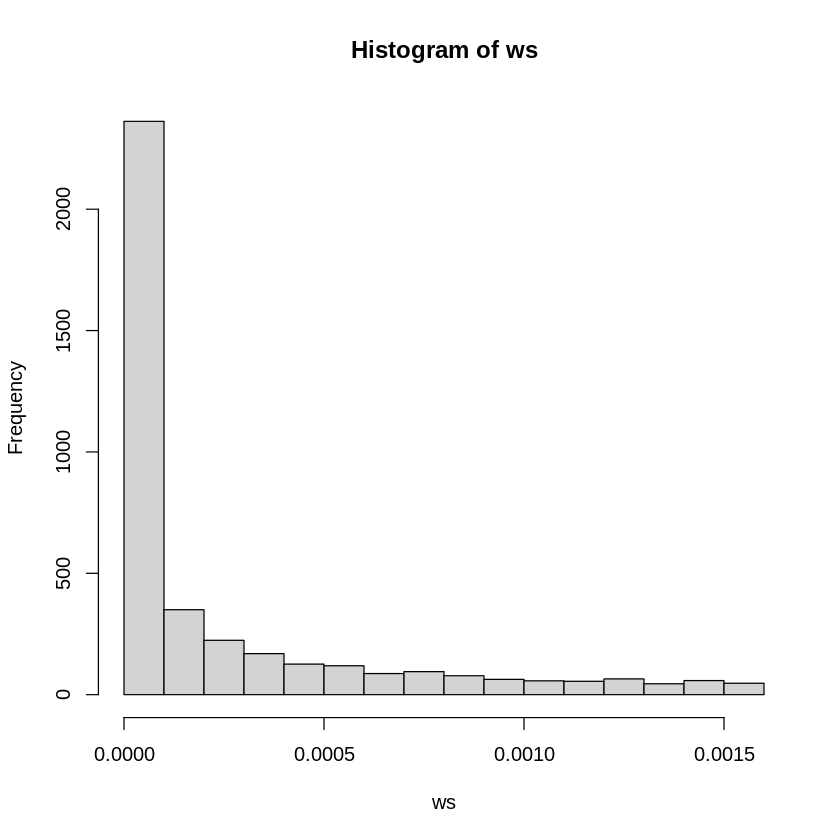

In [43]:
hist(ws, breaks = 20)

## f)

The effective sample size is given by:

$$
S_\text{eff} = \frac{1}{\sum_s w^{(s)^2}}
$$

provided the weights are normalized.

In [44]:
S_eff <- function(alpha, beta){
    
    ws    <- normalized_importance_weights(alpha,beta)
    S_eff <- 1 / sum( ws**2, na.rm = TRUE )
    S_eff
    
}

In [46]:
alpha_test <- c(1.896, -3.6, 0.374, 0.964, -3.123, -1.581)
beta_test  <- c(24.76, 20.04, 6.15, 18.65, 8.16, 17.4)
round(S_eff(alpha = alpha, beta = beta),3)

[1] 1161.842

## g)

The effective sample size represents the equivalent number of samples from a direct Monte Carlo if all the samples from the sampler (in this case the importance sampler) are used. In other words using the $4000$ samples we have drawn is equivalent to using 419.4 from a direct Monte Carlo.


Note that since we have drawn $4000$ samples. If all the samples are perfect (a ratio of 1) then this means that the perfect normalized importance weights would have a value of $\frac{1}{4000}=0.00025$. We can see in the histogram that there are very few normalized importance weights around $0.00025$ which explains this low value of $S_\text{eff}$.


## h)

This exercise asks for the posterior mean using a self normalized importance sampler. For our particular exercise we have the following. First we have the posterior:

$$
p(\theta | x,y,n) = c \prod_i p(y_i\mid\alpha,\beta,n_i,x_i)  p(\alpha,\beta)
$$

$$
%
\mathbb{E}[\theta] = c \int \theta \, \hat{p}(\theta | x,y,n) \text{d}\theta = \\
%
%
\frac{c \int \theta(\alpha,\beta)\, \hat{p}(\alpha,\beta | x,y,n) \frac{p(\alpha,\beta)}{p(\alpha,\beta)}\text{d}\theta}{c \int  \hat{p}(\alpha,\beta | x,y,n)  \frac{p(\alpha,\beta)}{p(\alpha,\beta)}} \approx \\ 
%
%
\frac{\sum_s \theta(\alpha_s,\beta_s) w_s }{\sum_s w_s};\alpha_s,\beta_s \sim p(\alpha,\beta) 
$$

with:

$$
\log w_s = \log p(y_i\mid\alpha_s,\beta_s,n_i,x_i)
$$

Okay, after writting this I have realized the exercise refers to the expected value of $\alpha$ and $\beta$. This simplifies everything to:

$$
\frac{\sum_s [\alpha_s,\beta_s] w_s }{\sum_s w_s};\alpha_s,\beta_s \sim p(\alpha,\beta) 
$$



In [39]:
posterior_mean <- function(alpha, beta){
    
    ## get log importance weights
    ws_log <- log_importance_weights( alpha, beta ) 
    
    ## denominator (would be better with log sum exp)
    den  <- sum(exp(ws_log), na.rm = TRUE )
    
    ## numerator
    alpha_mean <- sum(alpha * exp(ws_log), na.rm = TRUE ) 
    beta_mean  <- sum(beta  * exp(ws_log), na.rm = TRUE ) 
    
    ## posterior means
    c( alpha_mean / den, beta_mean / den )
}

In [40]:
alpha_test <- c(1.896, -3.6, 0.374, 0.964, -3.123, -1.581)
beta_test  <- c(24.76, 20.04, 6.15, 18.65, 8.16, 17.4)
round(posterior_mean(alpha = alpha, beta = beta),3)

[1]  0.941 10.538

In [20]:
library(markmyassignment)
assignment_path <-
paste("https://github.com/avehtari/BDA_course_Aalto/",
"blob/master/assignments/tests/assignment4.yml", sep="")
set_assignment(assignment_path)
# To check your code/functions, just run
mark_my_assignment()

Assignment set:
assignment4: Bayesian Data Analysis: Assignment 4
The assignment contain the following (4) tasks:
- log_importance_weights
- normalized_importance_weights
- S_eff
- posterior_mean




✔ | F W S  OK | Context
✔ |         5 | log_importance_weights() [0.2s]
✔ |         5 | normalized_importance_weights()
✔ |         5 | S_eff()
✔ |         5 | posterior_mean()

══ Results ════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════
Duration: 0.2 s

[ FAIL 0 | WARN 0 | SKIP 0 | PASS 20 ]
Good work!